In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.processor import RealEstateValuator

# Configuration
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
# Initialize and Train
# Ensure data/train.csv exists
engine = RealEstateValuator('train.csv', 'test.csv')
results = engine.train()

print(f"Training Accuracy (R2): {results['r2']:.4f}")
print(f"Root Mean Squared Error: {results['rmse']:.4f}")

Training Accuracy (R2): 0.9034
Root Mean Squared Error: 0.1343


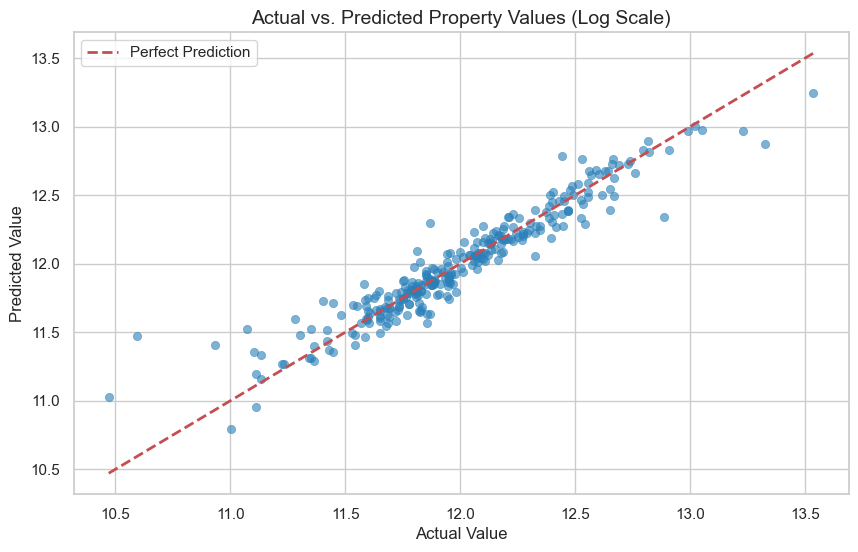

In [12]:
# Visualization 1: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['y_val'], y=results['predicted'], alpha=0.6, edgecolor=None, color="#2980b9")

# Plot diagonal reference line
min_val = min(results['y_val'].min(), results['predicted'].min())
max_val = max(results['y_val'].max(), results['predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title("Actual vs. Predicted Property Values (Log Scale)", fontsize=14)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11960\2676753595.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')


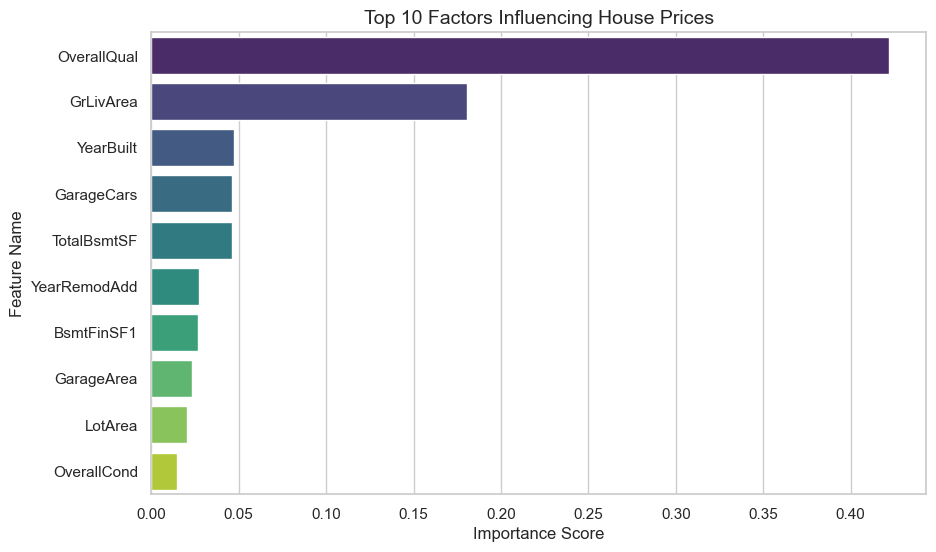

In [15]:
# Visualization 2: Feature Importance
features_df = pd.DataFrame({
    'Feature': results['feature_names'],
    'Importance': results['importances']
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Factors Influencing House Prices", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [18]:
# Generate Output
engine.predict_submission()

Submission saved to submission.csv
